In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [3]:
od.download("https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: parineeta03
Your Kaggle Key: ··········


100%|██████████| 199k/199k [00:00<00:00, 292MB/s]


Extracting archive ./house-prices-advanced-regression-techniques/house-prices-advanced-regression-techniques.zip to ./house-prices-advanced-regression-techniques


In [4]:
df = pd.read_csv("/content/house-prices-advanced-regression-techniques/train.csv")

In [5]:
df.shape

(1460, 81)

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [10]:
print("Missing values per column Top 20:")
print(df.isnull().sum().sort_values(ascending=False).head(20))

Missing values per column Top 20:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
dtype: int64


In [11]:
# 5. Handle Missing Values
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill numeric NaNs with median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical NaNs with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("✅ Missing values handled")

✅ Missing values handled


In [12]:
# 6. Encode Categorical Features
if 'OverallQual' in df.columns:
    le = LabelEncoder()
    df['OverallQual'] = le.fit_transform(df['OverallQual'])

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

print("✅ Encoding done. New Shape:", df.shape)

✅ Encoding done. New Shape: (1460, 246)


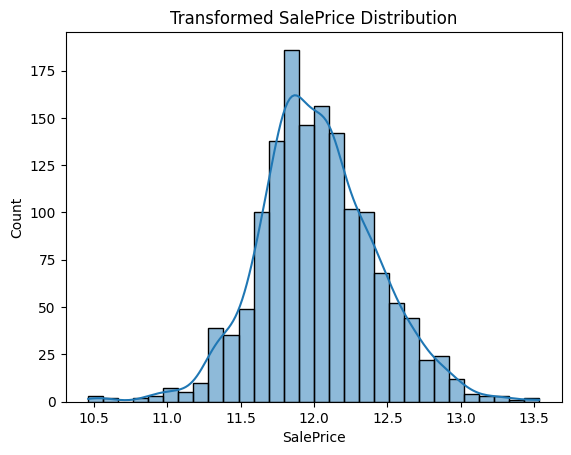

In [13]:
# 7. Log Transform the Target (SalePrice)
df['SalePrice'] = np.log1p(df['SalePrice'])

sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title("Transformed SalePrice Distribution")
plt.show()

In [14]:
# 8. Split Features & Target
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (1168, 245) Test: (292, 245)


In [15]:
# 9. Train Random Forest Model
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("✅ Model trained successfully")
print("RMSE:", rmse)

✅ Model trained successfully
RMSE: 0.1473965477495023


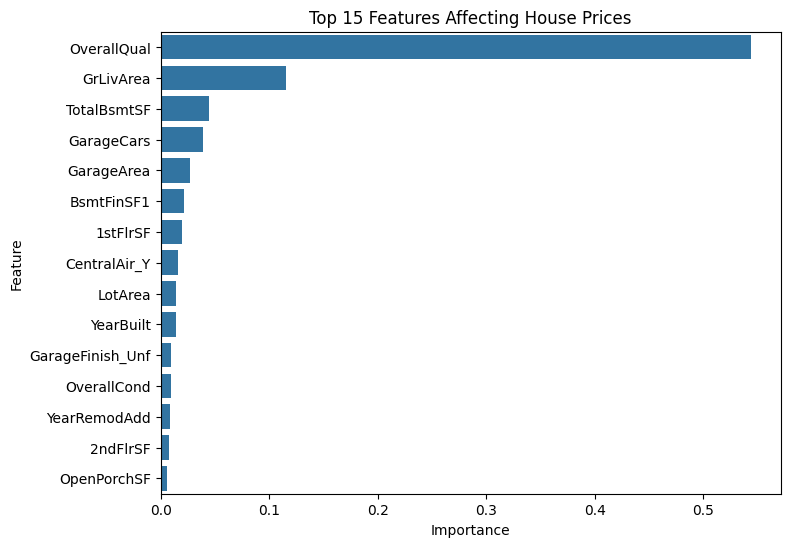

In [16]:
# 10. Feature Importance
importances = rf.feature_importances_
features = X.columns

feat_df = pd.DataFrame({"Feature": features, "Importance": importances})
feat_df = feat_df.sort_values("Importance", ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feat_df)
plt.title("Top 15 Features Affecting House Prices")
plt.show()